In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from datetime import datetime

In [111]:
fact = pd.read_csv("data/fact_train_test.csv", sep=";", decimal=",", encoding="windows-1251")
fact.head()

period  rps  podrod  filial  client_sap_id  freight_id  \
0  2012-07-01    1       5       1            328        1193   
1  2012-10-01    1       5       1            328        1193   
2  2014-03-01    0       1       1            328        3472   
3  2014-03-01    0       1       1            328        3472   
4  2014-03-01    0       2       1            328        3472   

   sender_station_id  recipient_station_id  sender_organisation_id  \
0              30252                 13005                   10036   
1              30252                 11376                   10036   
2              30252                 29548                   10036   
3              30252                 29158                   10036   
4              30252                 27484                   10036   

   real_weight  real_wagon_count  
0         71.0                 1  
1        210.0                 3  
2         67.0                 1  
3         67.0                 1  
4         66.0                 1

## Корреляции в датасете

In [112]:
fact.corr(numeric_only=True)

rps    podrod    filial  client_sap_id  \
rps                     1.000000  0.949643 -0.124473       0.011871   
podrod                  0.949643  1.000000 -0.121722      -0.006962   
filial                 -0.124473 -0.121722  1.000000      -0.005331   
client_sap_id           0.011871 -0.006962 -0.005331       1.000000   
freight_id             -0.345959 -0.318249  0.071980      -0.035435   
sender_station_id       0.119990  0.109985 -0.046793       0.088418   
recipient_station_id   -0.101866 -0.101409  0.011534       0.024225   
sender_organisation_id -0.013185 -0.025948 -0.044723       0.063337   
real_weight             0.108414  0.095746 -0.034667       0.058095   
real_wagon_count        0.110028  0.098343 -0.033743       0.055654   

                        freight_id  sender_station_id  recipient_station_id  \
rps                      -0.345959           0.119990             -0.101866   
podrod                   -0.318249           0.109985             -0.101409   
filial                    0.071980          -0.046793              0.011534   
client_sap_id            -0.035435           0.088418              0.024225   
freight_id                1.000000          -0.086154              0.044101   
sender_station_id        -0.086154           1.000000              0.264580   
recipient_station_id      0.044101           0.264580              1.000000   
sender_organisation_id    0.015974          -0.003766              0.001574   
real_weight              -0.105683           0.046819              0.000229   
real_wagon_count         -0.105060           0.045837             -0.000669   

                        sender_organisation_id  real_weight  real_wagon_count  
rps                                  -0.013185     0.108414          0.110028  
podrod                               -0.025948     0.095746          0.098343  
filial                               -0.044723    -0.034667         -0.033743  
client_sap_id                         0.063337     0.058095          0.055654  
freight_id                            0.015974    -0.105683         -0.105060  
sender_station_id                    -0.003766     0.046819          0.045837  
recipient_station_id                  0.001574     0.000229         -0.000669  
sender_organisation_id                1.000000    -0.015821         -0.015796  
real_weight                          -0.015821     1.000000          0.997485  
real_wagon_count                     -0.015796     0.997485          1.000000

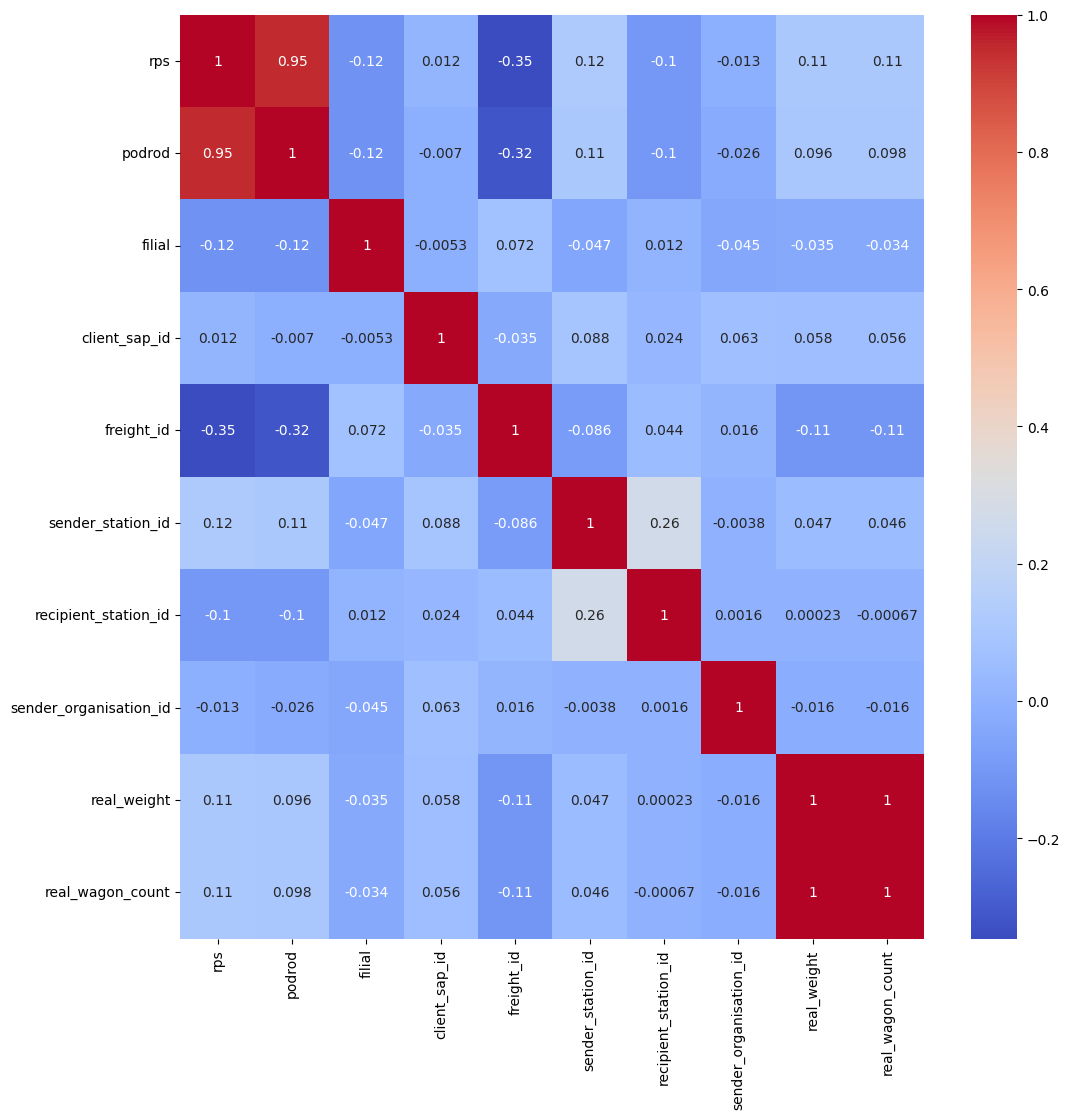

In [113]:
correlation = fact.corr(method='pearson',numeric_only=True)
plt.figure(figsize=(12, 12))  # Установите размер 
sns.heatmap(correlation, annot=True, cmap='coolwarm') # Тепловая карта
plt.show()

## Визуализация зависимостей признаков от даты 

In [114]:
plt.figure(figsize=(40,400))

for idx,col in enumerate(fact.columns[1:]):
    plt.subplot(10,1,idx+1)
    plt.plot(fact['period'],fact[col])
    plt.xticks(rotation=90,fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("Period/"+col,fontsize=25)
    plt.xlabel("Period",fontsize=25)
    plt.ylabel(col,fontsize=25)


## Обрезка данных до 2017 года

In [115]:
new_fact = fact.copy()
new_fact["period"] = fact["period"].astype("datetime64[ns]")
new_fact = new_fact[new_fact["period"].dt.year>=2017]
new_fact

period  rps  podrod  filial  client_sap_id  freight_id  \
2468    2017-01-01    0       0       0             -1          23   
2469    2017-01-01    0       0       0             -1        4225   
2470    2017-01-01    0       0       0             -1        4228   
2471    2017-01-01    0       0       0             -1        4293   
2472    2017-01-01    0       0       0             -1        3320   
...            ...  ...     ...     ...            ...         ...   
3559227 2023-03-01    1       5       2           1346        1482   
3559228 2023-03-01    1       5       2           1346        1492   
3559229 2023-03-01    1       5       2           1346        1492   
3559230 2023-03-01    1       5       2           1346        1492   
3559231 2023-03-01    1       5       2           1346        1492   

         sender_station_id  recipient_station_id  sender_organisation_id  \
2468                 11020                 37638                     672   
2469                 11020                 37638                     672   
2470                 11020                 37638                     672   
2471                 11020                 37638                     672   
2472                 11020                 37638                     672   
...                    ...                   ...                     ...   
3559227              31438                 31482                       0   
3559228              31438                 36091                   27275   
3559229              31438                 35450                   27275   
3559230              31438                 31482                       0   
3559231              31438                 31482                   25816   

         real_weight  real_wagon_count  
2468            62.0                 5  
2469            13.0                 2  
2470             6.0                 0  
2471            14.0                 0  
2472            52.0                 0  
...              ...               ...  
3559227         69.0                 1  
3559228         70.0                 1  
3559229         70.0                 1  
3559230        207.0                 3  
3559231          0.0                 1  

[3556764 rows x 11 columns]

## Удаление строк с весом 0 и вагонами 0

In [116]:
new_fact = new_fact[(new_fact["real_weight"]!=0) &(new_fact["real_wagon_count"]!=0)]
new_fact

period  rps  podrod  filial  client_sap_id  freight_id  \
2468    2017-01-01    0       0       0             -1          23   
2469    2017-01-01    0       0       0             -1        4225   
2474    2017-01-01    0       0       0             -1        3328   
2475    2017-01-01    0       0       0             -1        3328   
2476    2017-01-01    0       0       0             -1        3328   
...            ...  ...     ...     ...            ...         ...   
3559226 2023-03-01    1       5       2           1707        1180   
3559227 2023-03-01    1       5       2           1346        1482   
3559228 2023-03-01    1       5       2           1346        1492   
3559229 2023-03-01    1       5       2           1346        1492   
3559230 2023-03-01    1       5       2           1346        1492   

         sender_station_id  recipient_station_id  sender_organisation_id  \
2468                 11020                 37638                     672   
2469                 11020                 37638                     672   
2474                 37644                 12300                      83   
2475                 37644                 29515                      83   
2476                 37644                 29517                      83   
...                    ...                   ...                     ...   
3559226              35513                 31188                   32267   
3559227              31438                 31482                       0   
3559228              31438                 36091                   27275   
3559229              31438                 35450                   27275   
3559230              31438                 31482                       0   

         real_weight  real_wagon_count  
2468            62.0                 5  
2469            13.0                 2  
2474            65.0                 1  
2475            64.0                 1  
2476            64.0                 1  
...              ...               ...  
3559226         66.0                 1  
3559227         69.0                 1  
3559228         70.0                 1  
3559229         70.0                 1  
3559230        207.0                 3  

[3335420 rows x 11 columns]

## Дроп некоторых признаков

In [117]:
new_fact = new_fact.drop(columns=['podrod','filial','sender_organisation_id'])
new_fact

period  rps  client_sap_id  freight_id  sender_station_id  \
2468    2017-01-01    0             -1          23              11020   
2469    2017-01-01    0             -1        4225              11020   
2474    2017-01-01    0             -1        3328              37644   
2475    2017-01-01    0             -1        3328              37644   
2476    2017-01-01    0             -1        3328              37644   
...            ...  ...            ...         ...                ...   
3559226 2023-03-01    1           1707        1180              35513   
3559227 2023-03-01    1           1346        1482              31438   
3559228 2023-03-01    1           1346        1492              31438   
3559229 2023-03-01    1           1346        1492              31438   
3559230 2023-03-01    1           1346        1492              31438   

         recipient_station_id  real_weight  real_wagon_count  
2468                    37638         62.0                 5  
2469                    37638         13.0                 2  
2474                    12300         65.0                 1  
2475                    29515         64.0                 1  
2476                    29517         64.0                 1  
...                       ...          ...               ...  
3559226                 31188         66.0                 1  
3559227                 31482         69.0                 1  
3559228                 36091         70.0                 1  
3559229                 35450         70.0                 1  
3559230                 31482        207.0                 3  

[3335420 rows x 8 columns]

## Вычисление коеффициента зависимости веса от количества вагонов

In [118]:
weight_vals = new_fact["real_weight"].values
wagon_vals = new_fact["real_wagon_count"].values
lim = len(weight_vals)
coef_vals = []

for i in range(lim):
    coef = weight_vals[i]/wagon_vals[i]  
    if coef != np.inf:
        coef_vals.append(coef)
    

In [119]:
np.array(coef_vals).mean()

62.50865517690342

## Добавление нового признака - кодирование даты

In [120]:
def encode_period(data):
    data["fact_idx"] = data.groupby(data["period"]).cumcount() + 1
    return data 


In [121]:
new_fact = encode_period(new_fact)
new_fact[39399::40]

period  rps  client_sap_id  freight_id  sender_station_id  \
44748   2017-01-01    1            690           0               5955   
44794   2017-02-01    0           1233         564              13637   
44834   2017-02-01    0             14         543              37462   
44874   2017-02-01    0             14         556              13256   
44914   2017-02-01    0             14         564              13256   
...            ...  ...            ...         ...                ...   
3559050 2023-03-01    1           1180        2399              28546   
3559090 2023-03-01    1           1180        2406              14275   
3559130 2023-03-01    1           1180        2406              14275   
3559170 2023-03-01    1           1180        2406              14275   
3559210 2023-03-01    1            768        1682              33683   

         recipient_station_id  real_weight  real_wagon_count  fact_idx  
44748                   23655        604.0                12     39400  
44794                   14552        160.0                 3        39  
44834                   37853         62.0                 1        79  
44874                    1798        178.0                 3       119  
44914                    8742         61.0                 1       159  
...                       ...          ...               ...       ...  
3559050                 32551         69.0                 1     44826  
3559090                 38322         68.0                 1     44866  
3559130                 30747         67.0                 1     44906  
3559170                 32594         68.0                 1     44946  
3559210                 35462         91.0                 2     44986  

[82401 rows x 9 columns]

In [122]:
new_fact["period"] = new_fact["period"].apply(lambda x: x.timestamp())

## Деление датасета

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X, y = new_fact[["period","fact_idx"]], new_fact['real_weight']

#train_test_split(new_fact[["period","fact_idx"]], new_fact['real_weight'], test_size=0.3)

In [107]:
! pip install xgboost

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 34.6 MB/s eta 0:00:0000:0100:01
DEPRECATION: torch-tensorrt 1.1.0a0 has a non-standard dependency specifier torch>=1.10.0+cu113<1.11.0. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torch-tensorrt or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


## Модель и обучение

In [108]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate

In [81]:
! pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
DEPRECATION: torch-tensorrt 1.1.0a0 has a non-standard dependency specifier torch>=1.10.0+cu113<1.11.0. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torch-tensorrt or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [125]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8,tree_method="hist", device="cuda")
#from statsmodels.tsa.arima.model import ARIMA 

#new_fact[["period","fact_idx"]], new_fact['real_weight']
#model_arima = ARIMA(monthly_wagon_count, order=(1, 1, 1))


In [126]:
folds = 5
scoring=['neg_mean_absolute_error','neg_mean_squared_error']

In [127]:
cv_results = cross_validate(model, X, y, cv=folds,scoring=scoring,return_estimator=True,return_indices=True) 

In [128]:
cv_results

{'fit_time': array([12.70420909, 12.63128257, 12.73758197, 13.00538397, 13.14938378]),
 'score_time': array([0.08421183, 0.08038688, 0.08551049, 0.08062196, 0.07845092]),
 'estimator': [XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
               enable_categorical=False, eta=0.1, eval_metric=None,
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=1000,
               n_jobs=None, num_parallel_tree=None, ...),
  XGBRegressor(base_score=None, booster=None, callbacks=No

In [129]:
best_model_idx = np.argmax(cv_results['test_neg_mean_absolute_error'])
best_model = cv_results['estimator'][best_model_idx]


In [130]:
new_fact[["period","fact_idx","real_weight"]].tail(10)

period  fact_idx  real_weight
3559221  1.677629e+09     44997         67.0
3559222  1.677629e+09     44998         36.0
3559223  1.677629e+09     44999        176.0
3559224  1.677629e+09     45000       5190.0
3559225  1.677629e+09     45001       2435.0
3559226  1.677629e+09     45002         66.0
3559227  1.677629e+09     45003         69.0
3559228  1.677629e+09     45004         70.0
3559229  1.677629e+09     45005         70.0
3559230  1.677629e+09     45006        207.0

In [131]:
best_model.predict(new_fact[["period","fact_idx"]].tail(10))

array([1170.0723, 1170.0723, 1170.0723, 1170.0723, 1170.0723, 1170.0723,
       1170.0723, 1170.0723, 1170.0723, 1170.0723], dtype=float32)

In [132]:
cv_mae = np.absolute(cv_results['test_neg_mean_absolute_error'].mean())
cv_mse = np.absolute(cv_results['test_neg_mean_squared_error'].mean())

cv_mae_std = np.absolute(cv_results['test_neg_mean_absolute_error'].std())
cv_mse_std = np.absolute(cv_results['test_neg_mean_squared_error'].std())

cv_mae, cv_mse, cv_mae_std, cv_mse_std

(2053.910498222199, 86776527.24216187, 76.32721571060279, 4903018.144492887)

# Ниже - вспомогательное, не относящеесся к решению

## Группировка по датам и суммирование - получаем суммарное количество вагонов и вес в месяц

In [133]:
new_fact.groupby(new_fact["period"]).sum()

rps  client_sap_id  freight_id  sender_station_id  \
period                                                              
1.483229e+09  25640       11128071    63862979         1059970206   
1.485907e+09  35350       15000217    87653729         1458901235   
1.488326e+09  31213       13510722    83608395         1338743244   
1.491005e+09  31112       13589170    83647359         1348806062   
1.493597e+09  31289       13790801    82421387         1357055511   
...             ...            ...         ...                ...   
1.667261e+09  26911       24095853    70022622         1139220874   
1.669853e+09  28111       25239773    73217214         1177534590   
1.672531e+09  25717       22981190    64761042         1051930301   
1.675210e+09  28087       24867427    70615030         1137252497   
1.677629e+09  30078       27310916    77913609         1233756061   

              recipient_station_id  real_weight  real_wagon_count    fact_idx  
period                                                                         
1.483229e+09            1030909481   60234542.0            893846   776239101  
1.485907e+09            1426236983   57388275.0            855014  1472426511  
1.488326e+09            1333156791   65616432.0            976819  1274796771  
1.491005e+09            1337178140   63803329.0            950350  1286588901  
1.493597e+09            1347800904   65750015.0            973364  1298384361  
...                            ...          ...               ...         ...  
1.667261e+09            1087064590   62246453.0            909636   848617003  
1.669853e+09            1099216199   61803160.0            906627   887068260  
1.672531e+09             980856828   59749718.0            876395   703181251  
1.675210e+09            1079809306   59954718.0            880431   836793595  
1.677629e+09            1192861970   67290172.0            988420  1012792521  

[75 rows x 8 columns]

## Приминение экспоненциального сглаживания к обрезанному датасету и визуализация

In [134]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [135]:
plt.figure(figsize=(40,400))

for idx,col in enumerate(new_fact.columns[9:]):
    plt.subplot(10,1,idx+1)
    plt.plot(new_fact['period'],new_fact[col],label="Actual")
    for alpha in [ 0.3,0.05]:
        plt.plot(new_fact['period'],exponential_smoothing(new_fact[col].to_numpy(), alpha), label=f"Alpha {alpha}")
    plt.xticks(rotation=90,fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("Exponential Smoothing Period/"+col,fontsize=25)
    plt.xlabel("Period",fontsize=25)
    plt.ylabel(col,fontsize=25)
    plt.legend(fontsize="20")

<Figure size 4000x40000 with 0 Axes>

In [136]:
class HoltWinters:

    """
    Модель Хольта-Винтерса с методом Брутлага для детектирования аномалий
    https://fedcsis.org/proceedings/2012/pliks/118.pdf

    # series - исходный временной ряд
    # slen - длина сезона
    # alpha, beta, gamma - коэффициенты модели Хольта-Винтерса
    # n_preds - горизонт предсказаний
    # scaling_factor - задаёт ширину доверительного интервала по Брутлагу (обычно принимает значения от 2 до 3)

    """

    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor

    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  

    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # вычисляем сезонные средние
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # вычисляем начальные значения
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []

        seasonals = self.initial_seasonal_components()

        for i in range(len(self.series)+self.n_preds):
            if i == 0: # инициализируем значения компонент
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])

                self.PredictedDeviation.append(0)

                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])

                continue
            if i >= len(self.series): # прогнозируем
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])

                # во время прогноза с каждым шагом увеличиваем неопределенность
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 

            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])

                # Отклонение рассчитывается в соответствии с алгоритмом Брутлага
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])

            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i % self.slen])
        return self.result
    

In [137]:
model = HoltWinters(series=new_fact.real_weight.to_numpy(),slen=3,alpha=0.2,beta=0.4,gamma=0.2,n_preds=6)
res = model.triple_exponential_smoothing()

In [138]:
res

[62.0,
 48.70016529262599,
 62.793578526709375,
 63.1723006112363,
 60.51057812073331,
 68.90884609104758,
 377.95658114334117,
 214.69379771648795,
 214.1069608963309,
 397.6468481987081,
 180.65224816415582,
 162.69513056495475,
 240.99146381100132,
 54.57996925630985,
 45.40912116396887,
 111.11679863234278,
 29.297605117923936,
 108.74468355489584,
 536.0592931657316,
 403.7345451598579,
 329.9396212880887,
 422.7462290454579,
 188.3424219051064,
 113.47084872467832,
 280.43739377953113,
 89.69990968207591,
 195.52763848021965,
 249.0349830198416,
 96.03497603534618,
 82.13544715230026,
 274.6236223345676,
 81.24236496286908,
 247.76516815962697,
 282.5987986747011,
 123.79500067067188,
 190.35091081398795,
 683.9944351030292,
 559.668889766964,
 548.1199376133725,
 559.884031657621,
 363.29882554137134,
 281.9674949924839,
 266.8277943385123,
 117.21993947489489,
 117.83618072265348,
 132.71438186439855,
 5.524826108826879,
 7.3354603344873865,
 183.16731990656945,
 65.23529695546